In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("insurance.csv",sep=",")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
df=df.drop(["children","region"],axis=1)

In [7]:
df

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


In [8]:
label_encoder=LabelEncoder()
df["sex"]= label_encoder.fit_transform(df["sex"])


In [9]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:

print(df['smoker'].value_counts(normalize=True))


smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64


In [11]:
df["smoker"]= label_encoder.fit_transform(df["smoker"])

In [12]:
df

,age,sex,bmi,smoker,charges
0,19,0,27.900,1,16884.92400
1,18,1,33.770,0,1725.55230
2,28,1,33.000,0,4449.46200
3,33,1,22.705,0,21984.47061
4,32,1,28.880,0,3866.85520
...,...,...,...,...,...
1333,50,1,30.970,0,10600.54830
1334,18,0,31.920,0,2205.98080
1335,18,0,36.850,0,1629.83350
1336,21,0,25.800,0,2007.94500


In [13]:


X = df.drop(["charges"],axis=1) 
y = df["charges"].values 


# Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11 )

# Initializing the Linear regression model
model = LinearRegression()


# Training the model
model.fit(X_train, y_train)

# Predicting  test set
y_pred = model.predict(X_test)

# Evaluating accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


# Making predictions for new cases
new_cases = np.array([
    [23,0,78.07,1],  
    [23,0,28.06,0]   
])
predictions = model.predict(new_cases)
print(f"Predicted : {predictions}")



Mean Squared Error: 27848938.96
R² Score: 0.80
Predicted : [43485.66944552  3457.91922976]


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
results = []

for state in range(1, 201):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    results.append((state, mse, r2))


sorted_results = sorted(results, key=lambda x: (x[1], -x[2]))

for state, mse, r2 in sorted_results:
    print(f"Random State: {state} → MSE: {mse:.2f}  R²: {r2:.2f}")


Random State: 120 → MSE: 27294427.61  R²: 0.78
Random State: 11 → MSE: 27848938.96  R²: 0.80
Random State: 36 → MSE: 28776886.44  R²: 0.75
Random State: 13 → MSE: 28840274.83  R²: 0.80
Random State: 115 → MSE: 29292112.24  R²: 0.78
Random State: 15 → MSE: 29357720.42  R²: 0.77
Random State: 32 → MSE: 29536475.99  R²: 0.78
Random State: 177 → MSE: 29819104.05  R²: 0.75
Random State: 112 → MSE: 29936878.79  R²: 0.80
Random State: 20 → MSE: 30628988.47  R²: 0.80
Random State: 75 → MSE: 31080214.21  R²: 0.77
Random State: 132 → MSE: 31092483.45  R²: 0.76
Random State: 17 → MSE: 31142354.76  R²: 0.72
Random State: 123 → MSE: 31168050.39  R²: 0.80
Random State: 122 → MSE: 31405117.17  R²: 0.80
Random State: 47 → MSE: 31515275.04  R²: 0.79
Random State: 130 → MSE: 31641651.21  R²: 0.72
Random State: 114 → MSE: 31796476.37  R²: 0.74
Random State: 86 → MSE: 32123031.47  R²: 0.78
Random State: 95 → MSE: 32207746.82  R²: 0.77
Random State: 9 → MSE: 32209749.91  R²: 0.77
Random State: 6 → MSE: 324

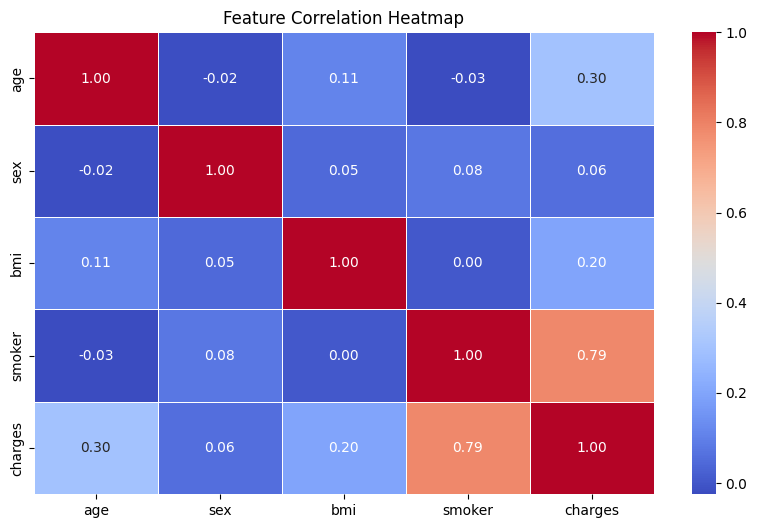

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
